### This code aims at comparing the displacement produced by a single nucleus of strain versus the displacement produced by a very small prisms using Nagy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pickle


In [2]:
import compaction as cp
import nucleus_of_strain as ns

In [3]:
#Parameters describing the reservoir

R = 0.5 #radius of the cylinder 
top = 750. #reservoir top
bottom = 751 #reservoir bottom
h = bottom - top #reservoir thickness

In [4]:
model = cp.prism_layer_circular((10,10), R, (1,1), bottom, top)

In [5]:
print(model)

[[  9.5  10.5   9.5  10.5 751.  750. ]]


In [6]:
# Geertsma’s nucleus of strain model  Equation 12.39 page 404 of the Book 
# Fjaer, E., et al., 2008. Petroleum Related Rock Mechanics, 2nd ed. Elsevier.

model_ns  = ns.nucleus_layer_circular((10,10), R, (1,1), bottom, top) 

In [7]:
print(model_ns)

[[ 10.   10.  750.5]]


In [8]:
# Pressure variation (in MPa)
DP    = np.zeros(len(model)) - 10000.
DP_ns = np.zeros(len(model_ns)) - 10000.


In [9]:
print(DP, DP_ns)

[-10000.] [-10000.]


#### Young’s modulus $E$ and  Poisson's ratio $\nu$ 

In [10]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

### The uniaxial compaction coefficient $C_m$ 
$C_m = \frac{1}{E} \: \frac{(1 + \nu) (1  - 2\nu)}{(1-\nu)}$

In [11]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
G = young/(2*(1+poisson)) # Shear Modulus in MPa
print ('CM', cm, 'G', G)

CM 0.0002525252525252525 G 1320.0


### Coordinates on the plane x = 0 m

In [12]:
# Define computation points on cross-sections at x  = 0
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coordinates = np.vstack([y, x, z])

In [13]:
coordinates.shape

(3, 2880)

#### Compute the displacement components on plane x = 0 m¶

In [14]:
# Compute the x-component of displacement

d_x1, d_x2, d_xz2 = cp.d_field_x_component(coordinates, model, DP, poisson, young)

displacement_x = d_x1 + (3 - 4*poisson)*d_x2 + d_xz2

# Compute the y-component of displacement

d_y1, d_y2, d_yz2 = cp.d_field_y_component(coordinates, model, DP, poisson, young)

displacement_y = d_y1 + (3 - 4*poisson)*d_y2 + d_yz2

# Compute the z-component of displacement

d_z1, d_z2, d_zz2 = cp.d_field_z_component(coordinates, model, DP, poisson, young)

displacement_z = d_z1 - (3 - 4*poisson)*d_z2 + d_zz2

In [15]:
# horizontal component of displacement equation (39)
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

### Geertsma’s nucleus of strain model:  Compute the displacement  components on plane x = 0 m

In [16]:
# Compute the x-component of displacement

d_x1_ns, d_x2_ns, d_xz2_ns = ns.d_field_x_component_ns(coordinates, model_ns, DP_ns, poisson, young)

displacement_x_ns = d_x1_ns + (3 - 4*poisson)*d_x2_ns + d_xz2_ns

# Compute the y-component of displacement

d_y1_ns, d_y2_ns, d_yz2_ns = ns.d_field_y_component_ns(coordinates, model_ns, DP_ns, poisson, young)

displacement_y_ns = d_y1_ns + (3 - 4*poisson)*d_y2_ns + d_yz2_ns

# Compute the z-component of displacement

d_z1_ns, d_z2_ns, d_zz2_ns = ns.d_field_z_component_ns(coordinates, model_ns, DP_ns, poisson, young)

displacement_z_ns = d_z1_ns - (3 - 4*poisson)*d_z2_ns + d_zz2_ns


In [17]:
# horizontal component of displacement 
displacement_horizontal_ns = np.sqrt(displacement_x_ns**2 + displacement_y_ns**2)

## PLOT DISPLACEMENT FIELD BY OUR METHODOLOGY: 

### Plot the results of the displacement fields on plane x = 0 m

In [18]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

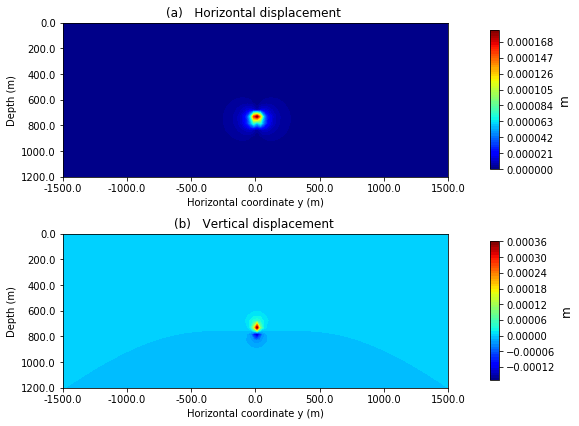

In [19]:
# Plot the displacement fields 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement ")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement.png', dpi=600)

# Plot the displacement fields by using Geertsma's (1973) nucleus of strain

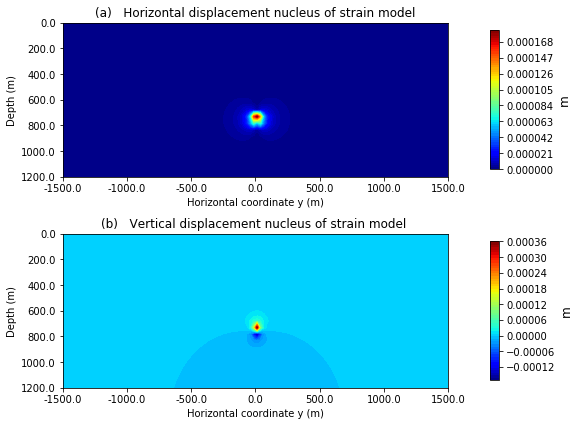

In [20]:
# Plot the displacement fields by using Geertsma's (1973) nucleus of strain
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal_ns.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement nucleus of strain model")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z_ns.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement nucleus of strain model ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Nucleus_Strain.png', dpi=600)

In [21]:
DP

array([-10000.])

In [22]:
#Difference Horizontal Displacement Nagy Geertsma nucleus 
diff_horizontal_nagy_ns = displacement_horizontal - displacement_horizontal_ns 

#Difference Vertical Displacement Nagy Geertsma nucleus 
diff_Vertical_nagy_ns = displacement_z - displacement_z_ns 



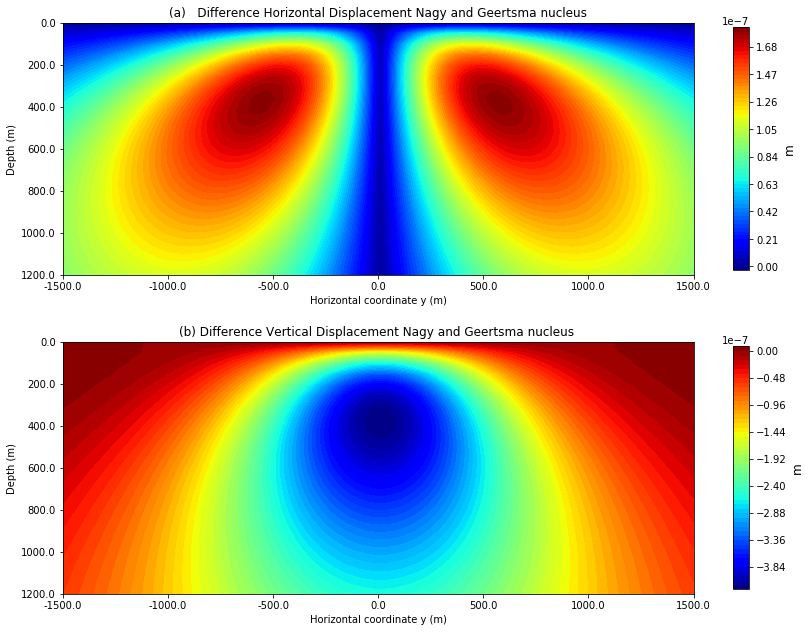

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,9))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, diff_horizontal_nagy_ns.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Difference Horizontal Displacement Nagy and Geertsma nucleus")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, diff_Vertical_nagy_ns.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b) Difference Vertical Displacement Nagy and Geertsma nucleus ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")

plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Geertsma.png', dpi=600)